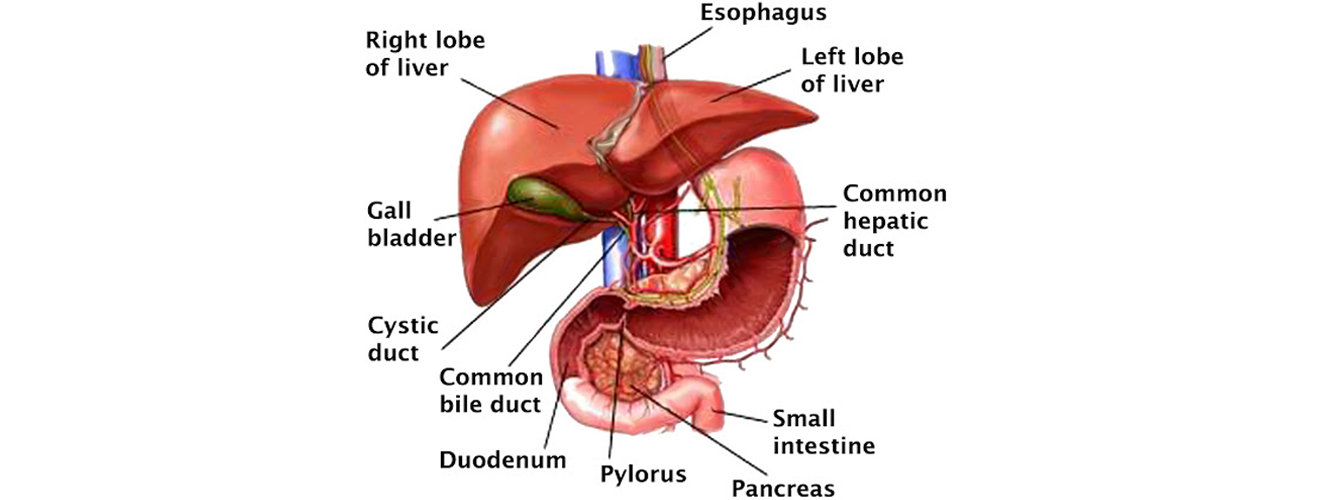

In [1]:
from IPython.display import Image
Image(filename='liver_banner.jpg') 


## Description

There has been a sudden upsurge in the no. of patients with Liver Disease. All this is due to the unhealthy eating habits and improper lifestyle of people.Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

## Content

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

## Acknowledgements

This dataset was downloaded from the UCI ML Repository:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

## Problem Statement

By using these patient records to determine which patients have liver disease and which ones do not.

## Data Description

Any patient whose age is above 89 is counted as of age "90".

Columns:

Age of the patient

Gender of the patient

Total Bilirubin
  Bilirubin is an orange-yellow pigment that occurs normally when part of your red blood cells break down.
 A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease.

Direct Bilirubin
  Bilirubin attached by the liver to glucuronic acid, a glucose-derived acid, is called direct, or conjugated, bilirubin. Bilirubin not attached to glucuronic acid is called indirect

Alkaline Phosphotase
  Alkaline phosphatase (ALP) is an enzyme in a person's blood that helps break down proteins.Using an ALP test, it is possible to measure how much of this enzyme is circulating in a person’s blood.

Alamine Aminotransferase
  Alanine aminotransferase (ALT) is an enzyme found primarily in the liver and kidney.   ALT is increased with liver damage and is used to screen for and/or monitor liver disease. 

Aspartate Aminotransferase
  AST (aspartate aminotransferase) is an enzyme that is found mostly in the liver, but also in muscles. When your liver is damaged, it releases AST into your bloodstream. An AST blood test measures the amount of AST in your blood. The test can help your health care provider diagnose liver damage or disease.

Total Protiens
  Albumin and globulin are two types of protein in your body. The total protein test measures the total amount albumin and globulin in your body. 

Albumin

Albumin and Globulin Ratio

Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

## Objectives and Concerns

1.The cost of misclassification can be very high
2.There are no latency concerns

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
liver_df = pd.read_csv('indian_liver_patient.csv')

In [4]:
liver_df.head(20)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


## EDA

In [5]:
liver_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

## Data Visualization

<AxesSubplot:xlabel='Dataset', ylabel='count'>

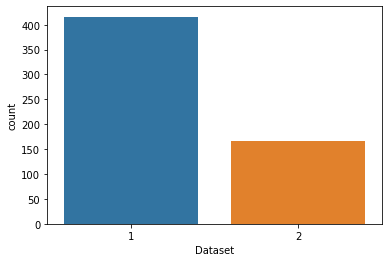

In [9]:
# Plotting the no. of patients with and without liver_disease
sns.countplot(data = liver_df,x='Dataset',label = "count")

In [10]:
LD,NLD = liver_df['Dataset'].value_counts()
print("The no of patients with Liver Disease: ",LD)
print("The no of patients without liver Disease: ",NLD)

The no of patients with Liver Disease:  416
The no of patients without liver Disease:  167


In [11]:
ratio = LD/(NLD+LD) *100

In [12]:
ratio

71.35506003430532

71% patients have liver disease

<AxesSubplot:xlabel='Gender', ylabel='count'>

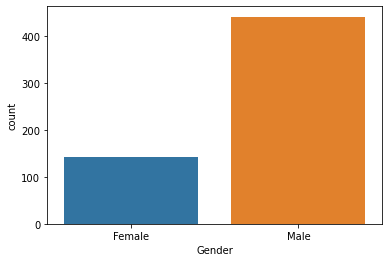

In [13]:
# Plotting the no of male and female pateints
sns.countplot(data = liver_df,x='Gender')

In [14]:
M,F = liver_df['Gender'].value_counts()

In [15]:
M,F

(441, 142)

In [16]:
M/(M+F) *100

75.64322469982847

75% PATIENTS ARE MALE

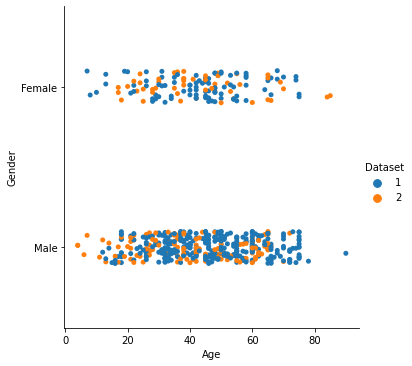

In [17]:
# lets plot catplots to better understand relationship b/w features
#b/w Gender and Age
sns.catplot(x="Age",y = "Gender",data = liver_df,hue='Dataset')

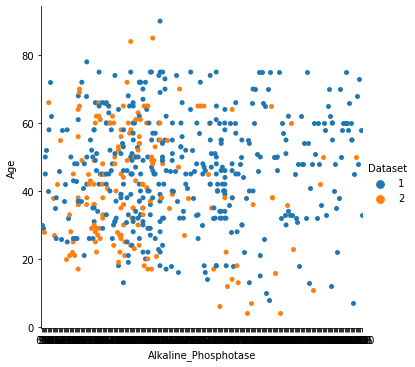

In [18]:
# b/w Alkaline_Phosphotase and age
sns.catplot(x='Alkaline_Phosphotase',y = 'Age',data = liver_df,hue = 'Dataset')

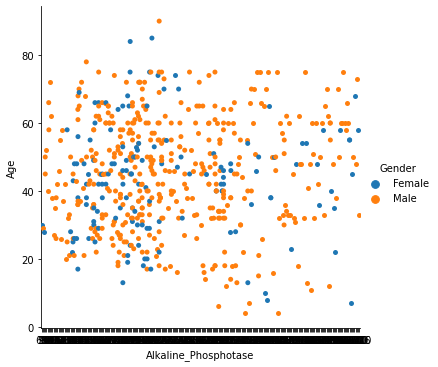

In [19]:
sns.catplot(x='Alkaline_Phosphotase',y = 'Age',data = liver_df,hue = 'Gender')

From above observations it's clear that quantity of ALP is higher in males as in indian society percentage of males who indulge in drinking and smoking is relatively higher than females.

In [20]:
liver_df[['Gender','Dataset','Age']].groupby(['Dataset','Gender'], as_index =False).mean().sort_values(by = 'Dataset',ascending = False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


Text(0.5, 0.98, 'Disease by gender and age')

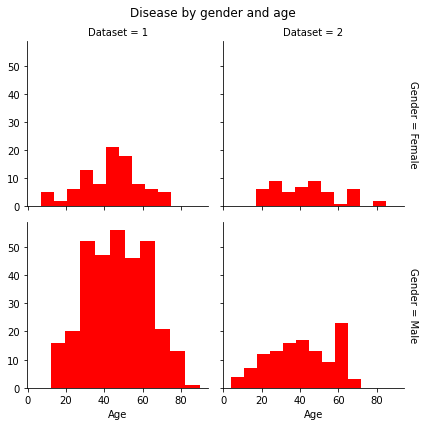

In [26]:
#Plotting age vs gender
g = sns.FacetGrid(liver_df, col = "Dataset",row = "Gender",margin_titles = True)
g.map(plt.hist,"Age",color="Red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Disease by gender and age")

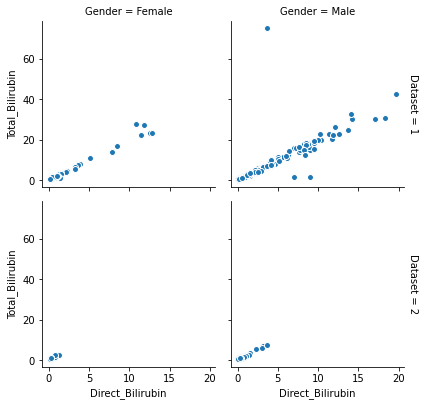

In [32]:
#Plotting gender with Total_Bilirubin and Direct_Bilirubin
g=sns.FacetGrid(liver_df,col = "Gender",row = "Dataset",margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin","Total_Bilirubin",edgecolor="w")
plt.subplots_adjust(top=0.9)

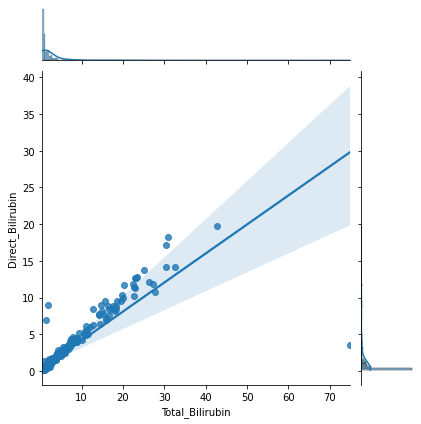

In [33]:
#plotting total vs direct bilirubin
sns.jointplot("Total_Bilirubin","Direct_Bilirubin",data=liver_df,kind = "reg")

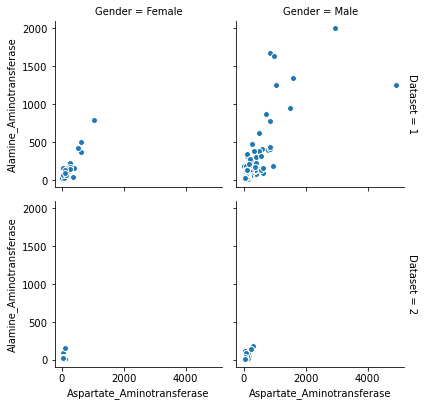

In [38]:
# Plotting Gender(Male/Female) along with Aspartate Aminotransferase, Alamine Aminotransferase
g = sns.FacetGrid(liver_df,row = "Dataset",col = "Gender",margin_titles = True)
g.map(plt.scatter,"Aspartate_Aminotransferase","Alamine_Aminotransferase",edgecolor="w")
plt.subplots_adjust(top=0.9)

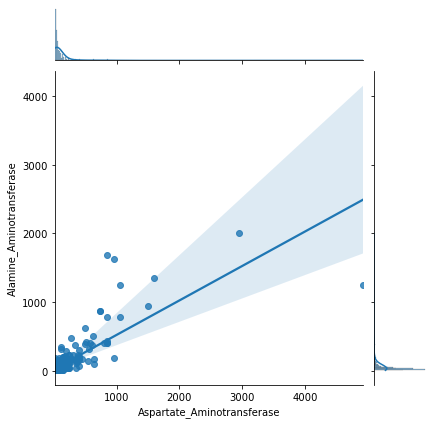

In [40]:
# Plotting Aspartate_Aminotransferase vs Alamine_Aminotransferase
sns.jointplot("Aspartate_Aminotransferase","Alamine_Aminotransferase",data = liver_df,kind="reg")

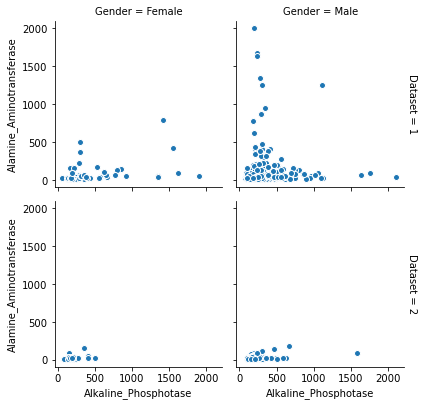

In [41]:
# Plotting Gender(Male/Female) along with Alkaline_Phosphotase and Alamine_Aminotransferase
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

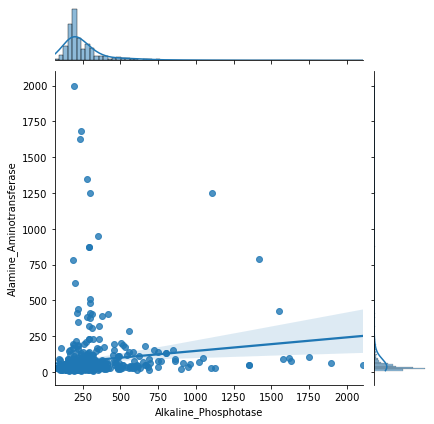

In [42]:
#PLotting jointplot b/w Alkaline_Phosphotase and Alamine_Aminotransferase
sns.jointplot("Alkaline_Phosphotase","Alamine_Aminotransferase",data = liver_df,kind = "reg")

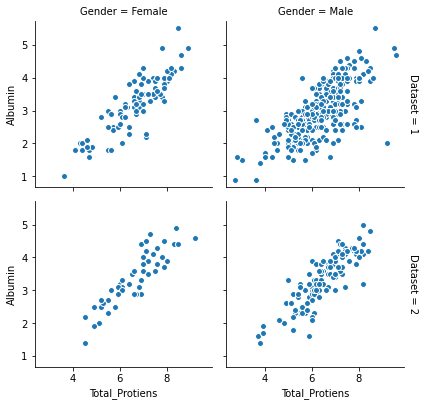

In [43]:
#Plotting gender with Total_Proteins and Albumin
g = sns.FacetGrid(liver_df,row="Dataset",col = "Gender",margin_titles = True)
g.map(plt.scatter,"Total_Protiens","Albumin",edgecolor="w")
plt.subplots_adjust(top=0.9)

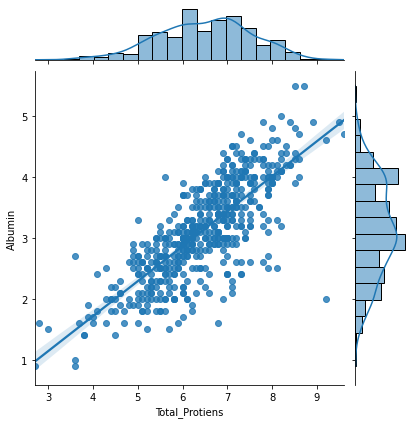

In [44]:
#plotting total proteins vs albumin
sns.jointplot("Total_Protiens","Albumin",data = liver_df,kind = "reg")

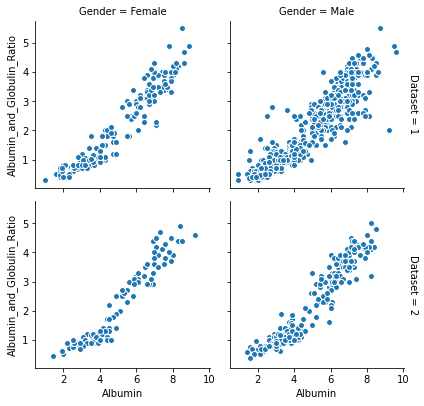

In [45]:
#g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

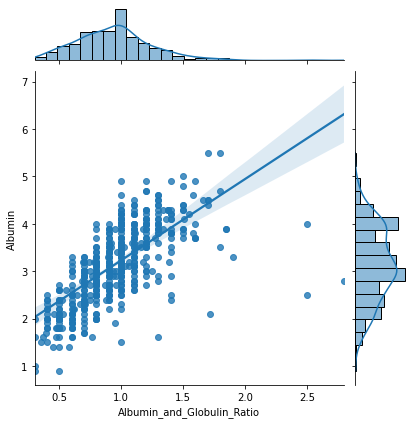

In [46]:
# Plotting Albumin vs Albumin_and_Globulin_Ratio
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

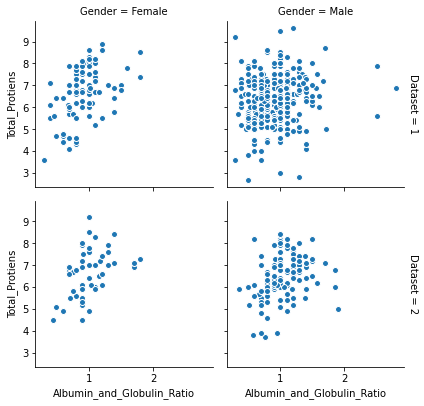

In [47]:
# Plotting Gender(Male/Female) along with Albumin and Globulin Ratio and Total Protiens
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

## Feature Engineering

In [48]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [53]:
pd.get_dummies(liver_df['Gender'],prefix = "Gender").head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [56]:
#Concatenation
liver_df= pd.concat([liver_df,pd.get_dummies(liver_df['Gender'],prefix = "Gender")],axis=1)

In [57]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [58]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [59]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [61]:
liver_df['Albumin_and_Globulin_Ratio'] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [64]:
X = liver_df.drop(['Gender','Dataset'],axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1


In [65]:
y = liver_df['Dataset']

## Correlation between features

In [68]:
liver_corr = X.corr()
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000


<AxesSubplot:>

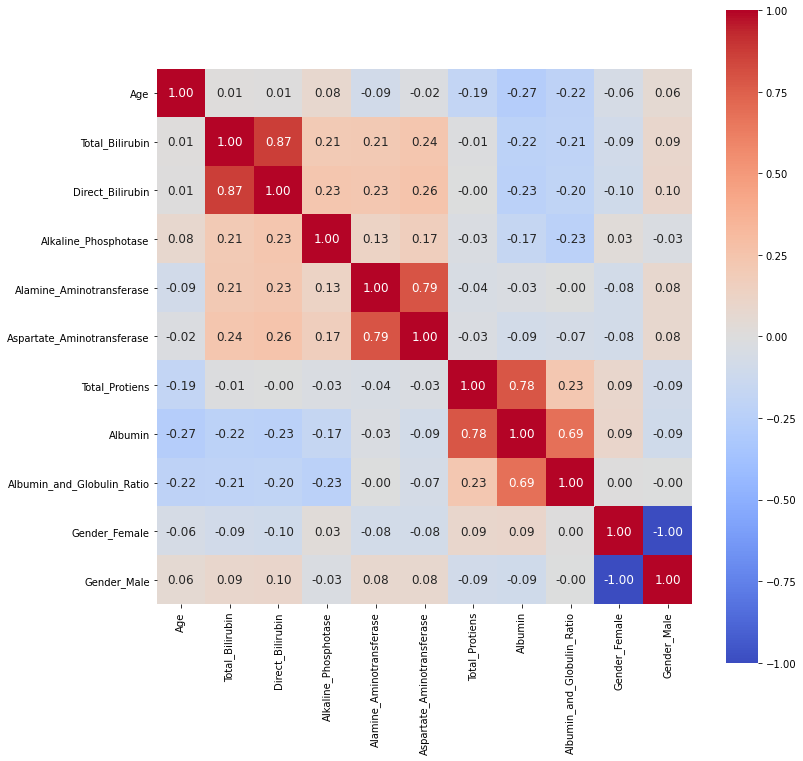

In [75]:
## Picking heatmaps for correlation
plt.figure(figsize = (12,12))
sns.heatmap(liver_corr,cmap = 'coolwarm',annot = True,cbar = True,square = True,fmt = '.2f',annot_kws = {'size':12})

## Splitting the data into train and test

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(390, 11)
(193, 11)
(390,)
(193,)


## Model Building

## Logistic Regression

In [85]:
lr = LogisticRegression()
#Train the model using train and test data
lr.fit(X_train,y_train)
lr_predicted = lr.predict(X_test)
lr_score = round(lr.score(X_train,y_train)*100,2)
lr_score_test = round(lr.score(X_test, y_test) * 100, 2)

In [86]:
# Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', lr_score)
print('Logistic Regression Test Score: \n', lr_score_test)

print('Accuracy: \n', accuracy_score(y_test,lr_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,lr_predicted))
print('Classification Report: \n', classification_report(y_test,lr_predicted))

Logistic Regression Training Score: 
 70.77
Logistic Regression Test Score: 
 72.54
Accuracy: 
 0.7253886010362695
Confusion Matrix: 
 [[131  10]
 [ 43   9]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.93      0.83       141
           2       0.47      0.17      0.25        52

    accuracy                           0.73       193
   macro avg       0.61      0.55      0.54       193
weighted avg       0.68      0.73      0.68       193



## Confusion matrix

<AxesSubplot:>

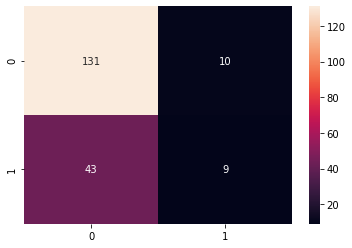

In [87]:
sns.heatmap(confusion_matrix(y_test,lr_predicted),annot = True,fmt="d")

## Gaussian Naive Bayes

In [91]:
gaussian  = GaussianNB()
gaussian.fit(X_train,y_train)
y_predicted = gaussian.predict(X_test)
gauss_score = round(gaussian.score(X_train,y_train)*100,2)
gauss_score_test = round(gaussian.score(X_test,y_test)*100,2)
print(gauss_score)
print(gauss_score_test)

53.59
57.51


In [92]:
print("Accuracy_score",accuracy_score(y_test,y_predicted))

Accuracy_score 0.5751295336787565


In [93]:
print("Confusion matrix",confusion_matrix(y_test,y_predicted))

Confusion matrix [[60 81]
 [ 1 51]]


In [94]:
print("Classification_report",classification_report(y_test,y_predicted))

Classification_report               precision    recall  f1-score   support

           1       0.98      0.43      0.59       141
           2       0.39      0.98      0.55        52

    accuracy                           0.58       193
   macro avg       0.68      0.70      0.57       193
weighted avg       0.82      0.58      0.58       193



<AxesSubplot:>

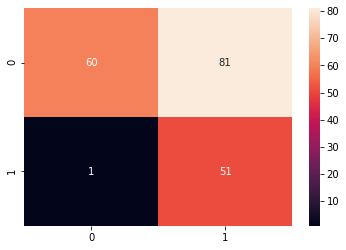

In [96]:
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt="d")

## Random Forest Classifier

In [111]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
#predict output
y_pred = rf.predict(X_test)
rf_score = round(rf.score(X_train,y_train)*100,2)
print("Train score",round(rf.score(X_train,y_train)*100,2))
rf_test_score = round(rf.score(X_test,y_test)*100,2)
print("test score",round(rf.score(X_test,y_test)*100,2))

Train score 100.0
test score 73.06


In [112]:
print(accuracy_score(y_test,y_pred))

0.7305699481865285


In [113]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[123  18]
 [ 34  18]]
              precision    recall  f1-score   support

           1       0.78      0.87      0.83       141
           2       0.50      0.35      0.41        52

    accuracy                           0.73       193
   macro avg       0.64      0.61      0.62       193
weighted avg       0.71      0.73      0.71       193



<AxesSubplot:>

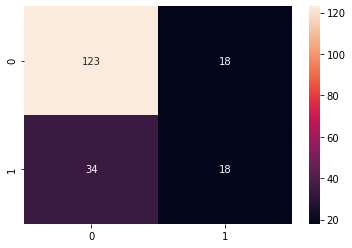

In [114]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt ="d")

## Model Evaluation

In [118]:
#Comparing all models
model = pd.DataFrame({
    'Model' : ["Logistic Regression","GaussianNB","Random Forest Classifier"],
    'Score' : [lr_score,gauss_score,rf_score],
    'Test_score': [lr_score_test,gauss_score_test,rf_test_score]
})

In [120]:
model.sort_values(by="Test_score",ascending=False)

,Model,Score,Test_score
2,Random Forest Classifier,100.00,73.06
0,Logistic Regression,70.77,72.54
1,GaussianNB,53.59,57.51


## From all the three models "Random Forest" and "Logistic Regression" perform the best